In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
def DrawMetrics(base_dir, experiments_list=[], metrics=[], x_axis="training_iteration", metric_names=None, max_step=None, step_size=None):
    fig, axes  = plt.subplots(len(metrics),1)
    name_mapper = {}
    for root, dirs, files in os.walk(base_dir):
        if "progress.csv" not in files:
            continue
        expName = root.split("/")[-2]
        if expName in experiments_list:
            try:
                df = pd.read_csv(root+"/progress.csv")
                """
                if max_step is not None:
                    if step_size is not None:
                        df = df.loc[list(range(0,max_step,step_size))]
                    else:
                        df = df.loc[:max_step]
                """
                if max_step is not None:
                    df = df.loc[:max_step]
                if step_size is not None:
                    df = df.loc[list(range(0,df.index[-1],step_size))]
                for m_i, metric in enumerate(metrics):
                    if m_i==0:
                        #axes[m_i].plot(df.index, df[metric], label=expName)
                        axes[m_i].plot(df[x_axis], df[metric], label=expName)
                    else:
                        #axes[m_i].plot(df.index, df[metric])
                        axes[m_i].plot(df[x_axis], df[metric])
            except pd.errors.EmptyDataError as ede:
                print(root)
                print("Empty data. " + str(ede))
                print()
            except KeyError as ke:
                print(root)
                print("no key " + str(ke))
                print()
    for m_i, metric in enumerate(metrics):
        if metric_names is None:
            axes[m_i].set_title(metric)
        else:
            axes[m_i].set_title(metric_names[m_i])
    fig.set_size_inches(15,15)
    fig.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


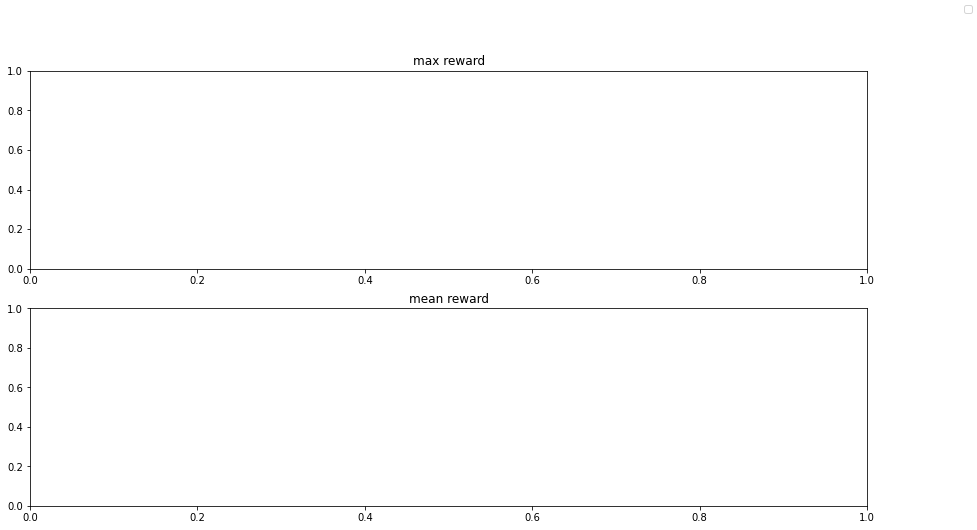

In [3]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS/allDefault/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    algoName = root.split("/")[-2]
    if algoName in ["appo_v2", "bc_v2", "a2c_v2", "marwil_v2", "impala_v2", "sac_v2", "es_v2"]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        if len(df) ==1:
            print(algoName, "1 iteration only")
        if "episode_reward_max" in df.columns:
            axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=algoName)
        else:
            print("No max column for {}, using cummax".format(algoName))
            axes[0].plot(df["timesteps_total"], df["episode_reward_mean"].cummax(), label=algoName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
axes[0].set_title("max reward")
axes[1].set_title("mean reward")
fig.set_size_inches(15,8)
fig.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


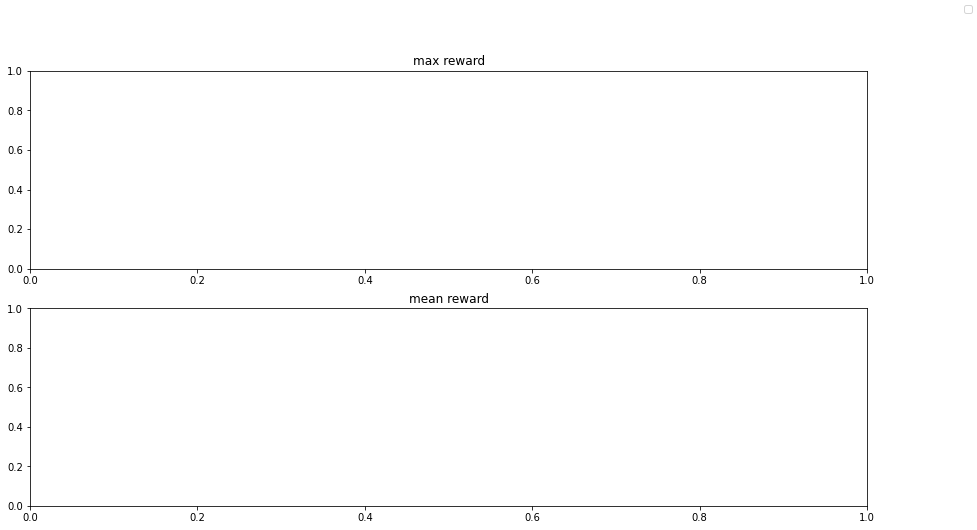

In [3]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    algoName = root.split("/")[-2]
    if algoName in ["appo", "bc", "a2c", "marwil", "impala", "sac", "a3c", "ars", "es"]:
    #if algoName in ["appo", "bc", "a2c", "marwil", "impala", "sac", "ddpg", "a3c"]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        if len(df) ==1:
            print(algoName, "1 iteration only")
        if "episode_reward_max" in df.columns:
            axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=algoName)
        else:
            print("No max column for {}, using cummax".format(algoName))
            axes[0].plot(df["timesteps_total"], df["episode_reward_mean"].cummax(), label=algoName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
axes[0].set_title("max reward")
axes[1].set_title("mean reward")
fig.set_size_inches(15,8)
fig.legend()
plt.show()

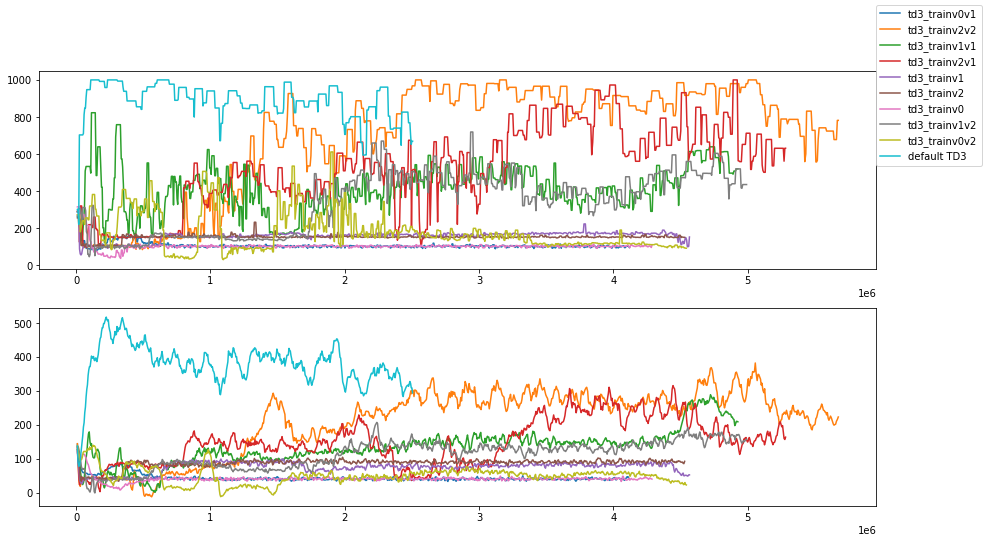

In [5]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/train/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in [#"td3_trainv0", "td3_trainv0v1", "td3_trainv0v2",
                    #"td3_trainv1", "td3_trainv1v1", "td3_trainv1v2",
                    #"td3_trainv2", "td3_trainv2v1", "td3_trainv2v2",
                    "td3_trainv0v3", "td3_trainv1v3", "td3_trainv2v3",
                    "td3_trainv4v0v0", "td3_trainv4v1v0","td3_trainv4v2v0", "td3_trainv4v3v0",
                    "td3_trainv4v0v1", "td3_trainv4v0v2", "td3_trainv4v0v3"
                    ]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()

df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

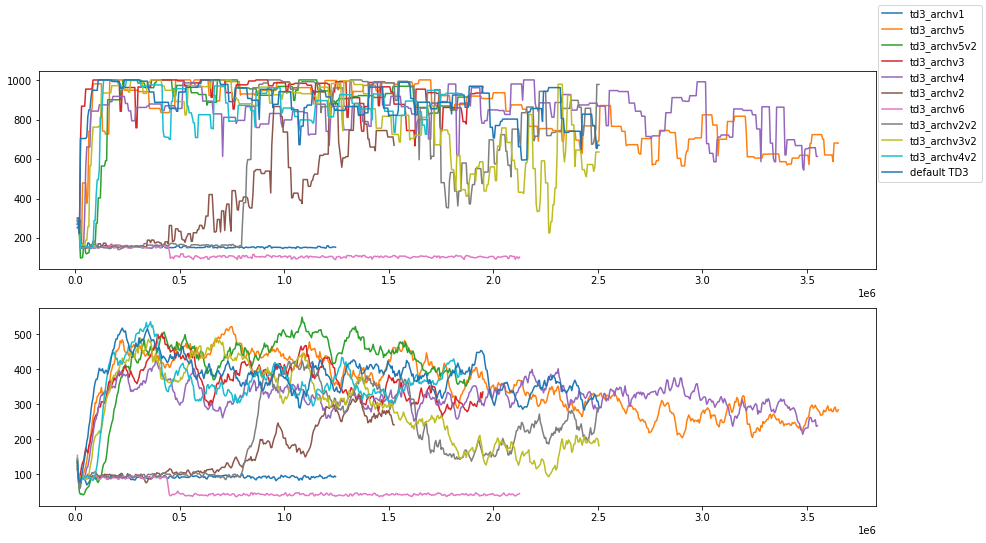

In [6]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/arch/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    #if expName in ["td3_archv6", "td3_archv1", "td3_archv2", "td3_archv2v2"]:
    #    continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

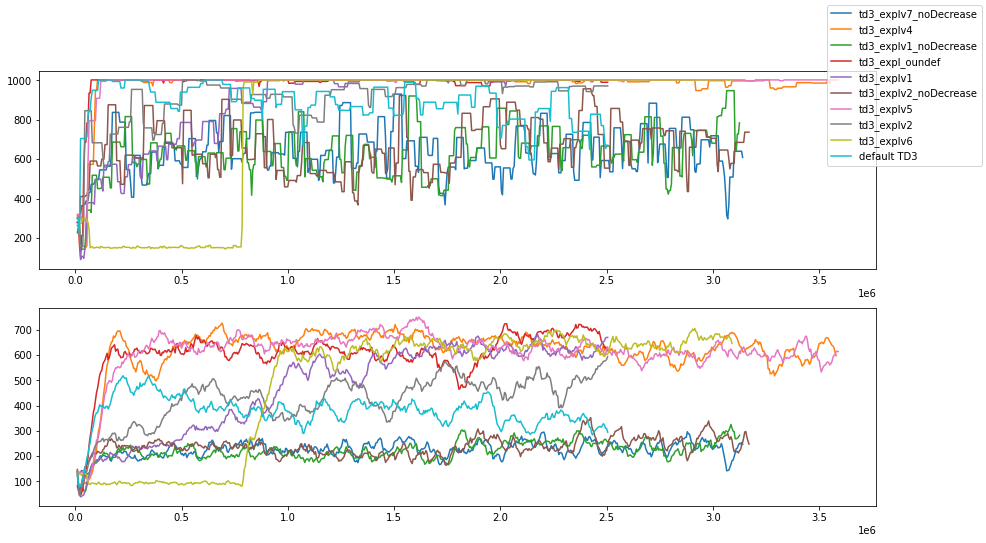

In [7]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/explore/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in []:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

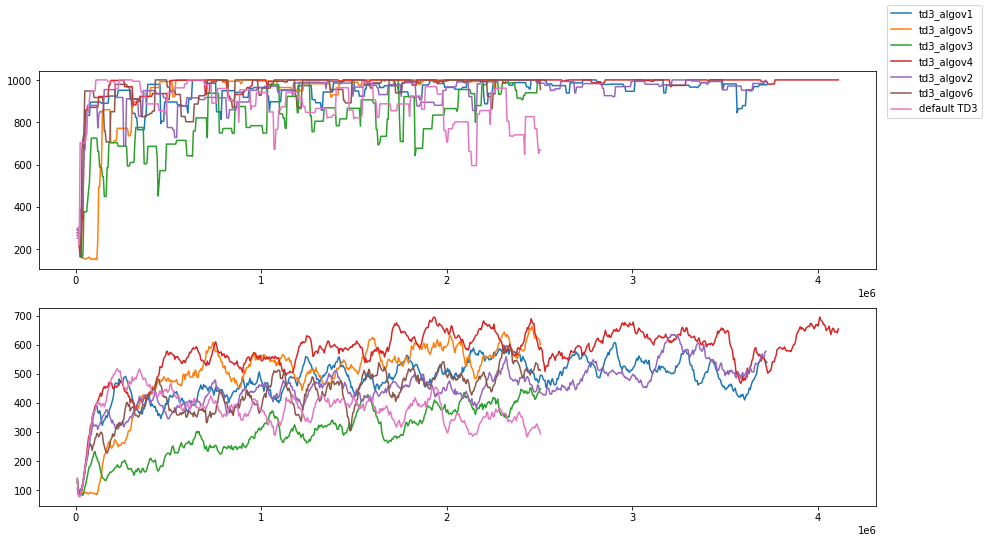

In [8]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/TD3/algorythm/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in []:
        continuea
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst/allDefault/td3/TD3_continuous-grid_fac69_00000_0_2022-03-15_22-27-40/progress.csv")
axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default TD3")
axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
fig.set_size_inches(15,8)
fig.legend()
plt.show()

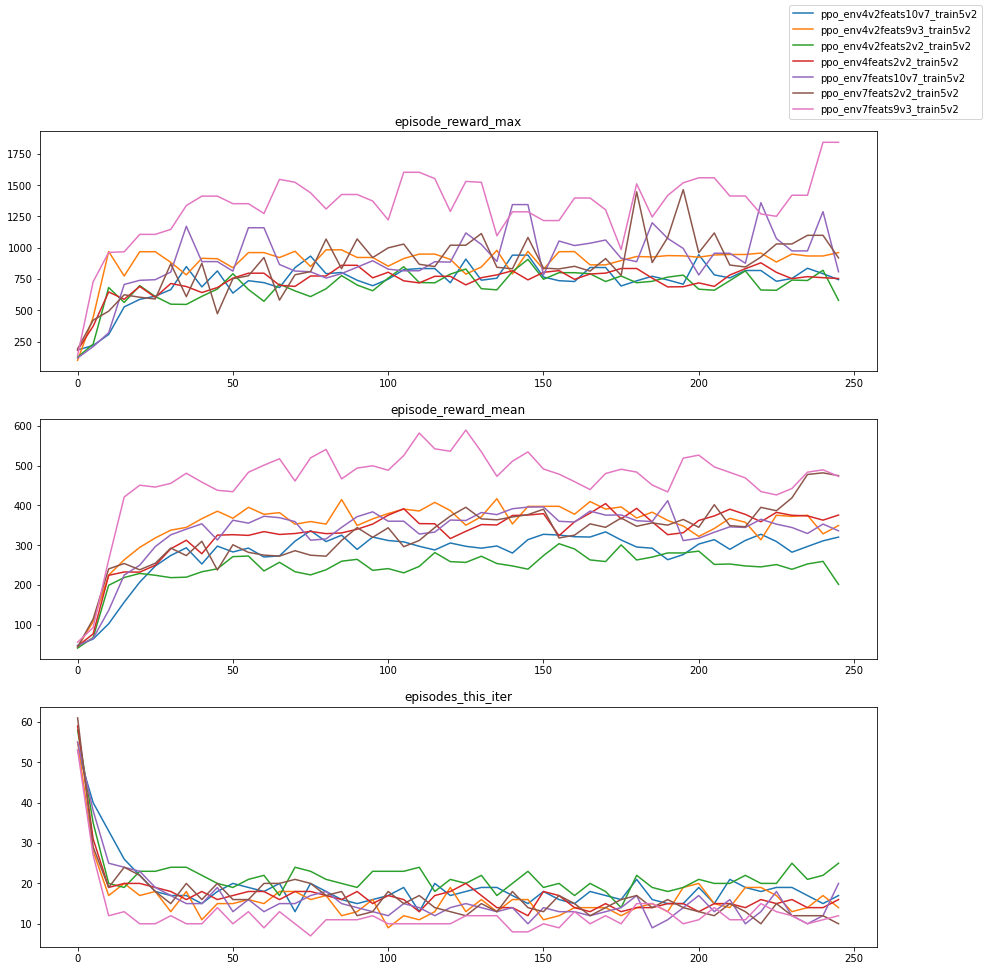

In [84]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/"
experiments_list = ["ppo_env4v2feats10v7_train5v2", "ppo_env4v2feats9v3_train5v2", "ppo_env4v2feats2v2_train5v2",
                   "ppo_env4feats2v2_train5v2", 
                   "ppo_env7feats2v2_train5v2", "ppo_env7feats10v7_train5v2", "ppo_env7feats9v3_train5v2"]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episodes_this_iter'], max_step=250, step_size=5)

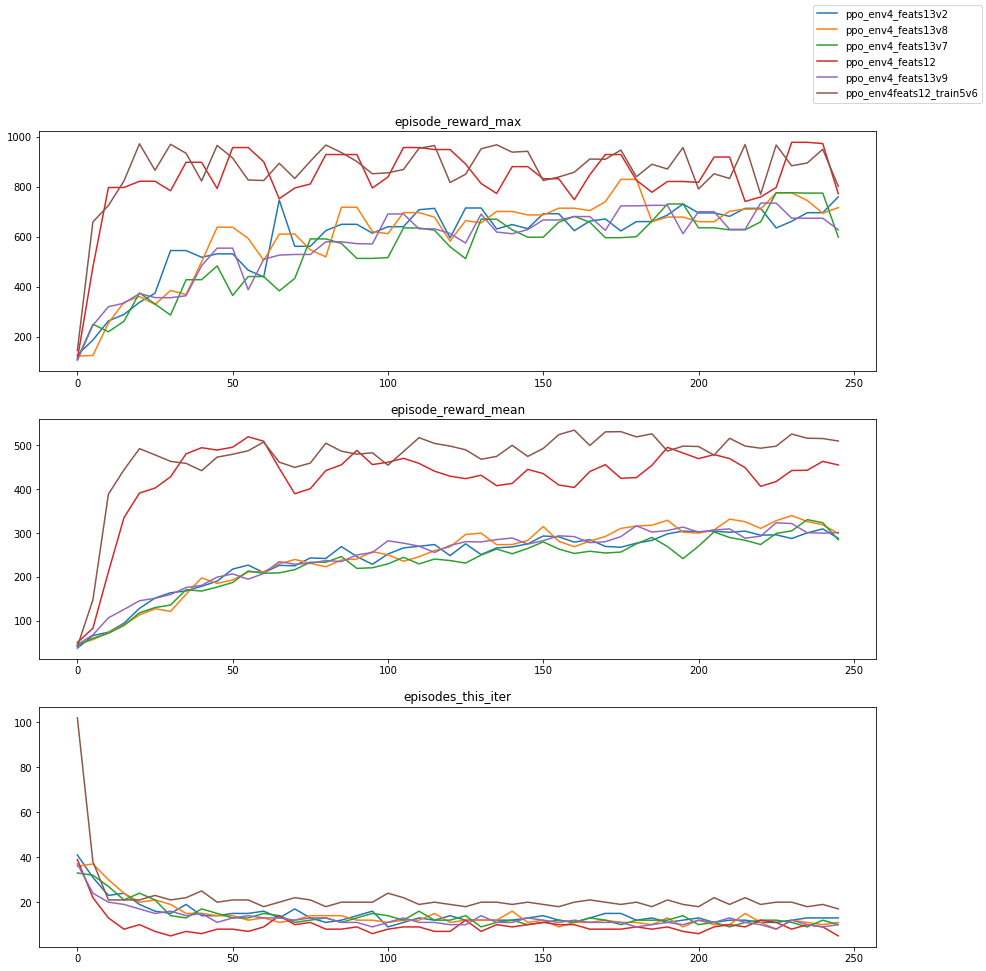

In [82]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/"
experiments_list = ["ppo_env4feats12_train5v6", "ppo_env4_feats12", 
                      # "ppo_env4_feats13",  # без сейф зоны - не очень
                       "ppo_env4_feats13v2", #"ppo_env4feats13v2_train5v6", 
                     # "ppo_env4_feats13v3",  "ppo_env4_feats13v5",  # коэффициент забывания 0.01 - плохо
                       #"ppo_env4_feats13v4",  # - незакрышиваем зону (криво реализован)
                     # "ppo_env4_feats13v6",  # как 13v2, но более точно отрисована зона - вроде немного хуже, что странно
                       "ppo_env4_feats13v7", "ppo_env4_feats13v8", "ppo_env4_feats13v9",  # коэффициенты забывания 0.1 0.2 0.5 - без разницы
                       #"ppo_env4_feats13v10", "ppo_env4_feats13v11" # коэффициент забывания = 1 - очень плохо
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episodes_this_iter'], max_step=250, step_size=5)

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/default_model/feats_v14v2/ppo_e28_b1_f14v2_prev5_m_trans_v4v2_backup/PPO_continuous-grid_5f031_00000_0_2023-06-14_18-08-51
no key '[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245] not in index'

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/default_model/feats_v14v2/ppo_e28_b1_f14v2_prev5_m_trans_v4v2_backup/PPO_continuous-grid_83085_00000_0_2023-06-14_18-02-42
no key '[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245] not in index'

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/d

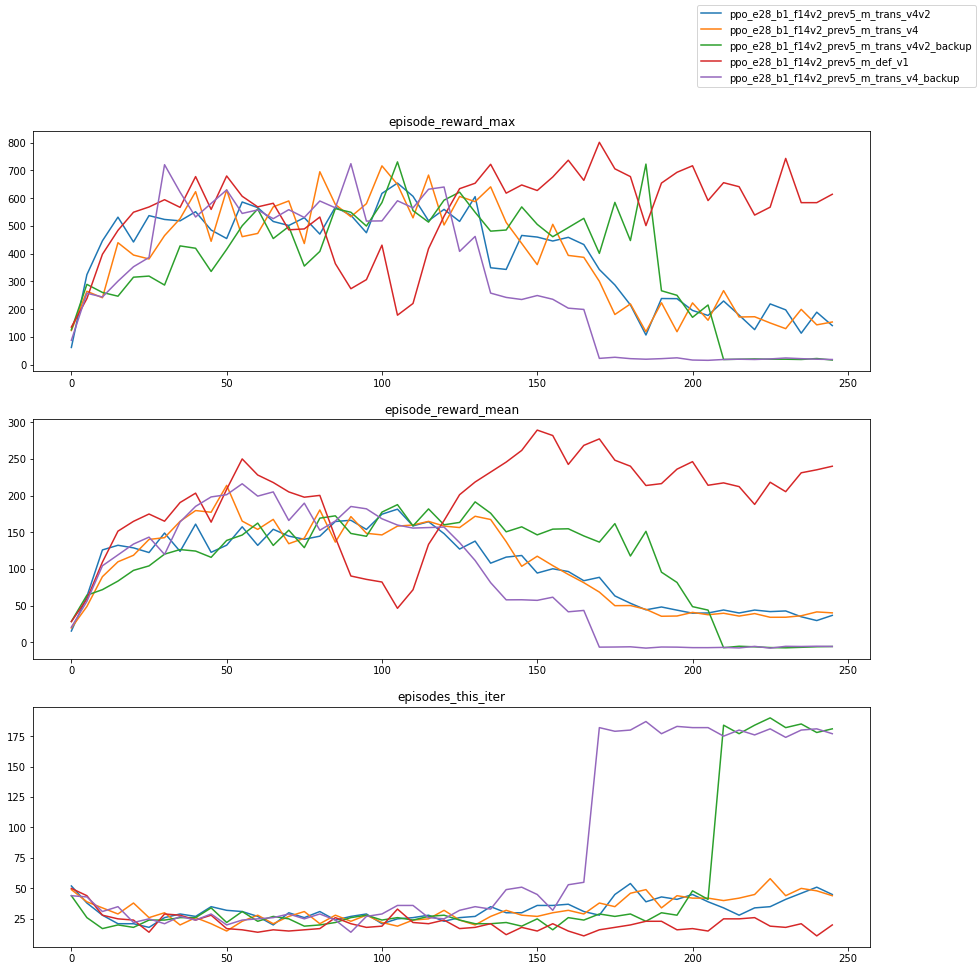

In [3]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/default_model/feats_v14v2/"
experiments_list = ["ppo_e28_b1_f14v2_prev5_m_def_v1", 
               #"ppo_e28_b1_f14v2_prev5_m_trans_v1",  # GlobalAveragePooling - плохо
               "ppo_e28_b1_f14v2_prev5_m_trans_v4_backup", "ppo_e28_b1_f14v2_prev5_m_trans_v4v2_backup",  # kl уходит в nan, возможно из-за слишком больших предсказываемых log_std для поворота
               "ppo_e28_b1_f14v2_prev5_m_trans_v4", 
               #"ppo_e28_b1_f14v2_prev5_m_trans_v5",  # без нормализации и дропаутов - плохо
               "ppo_e28_b1_f14v2_prev5_m_trans_v4v2",
               #"ppo_e28_b1_f14v2_prev5_m_trans_v4v3"  # GlobalAveragePooling - плохо
              ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episodes_this_iter'], max_step=250, step_size=5)


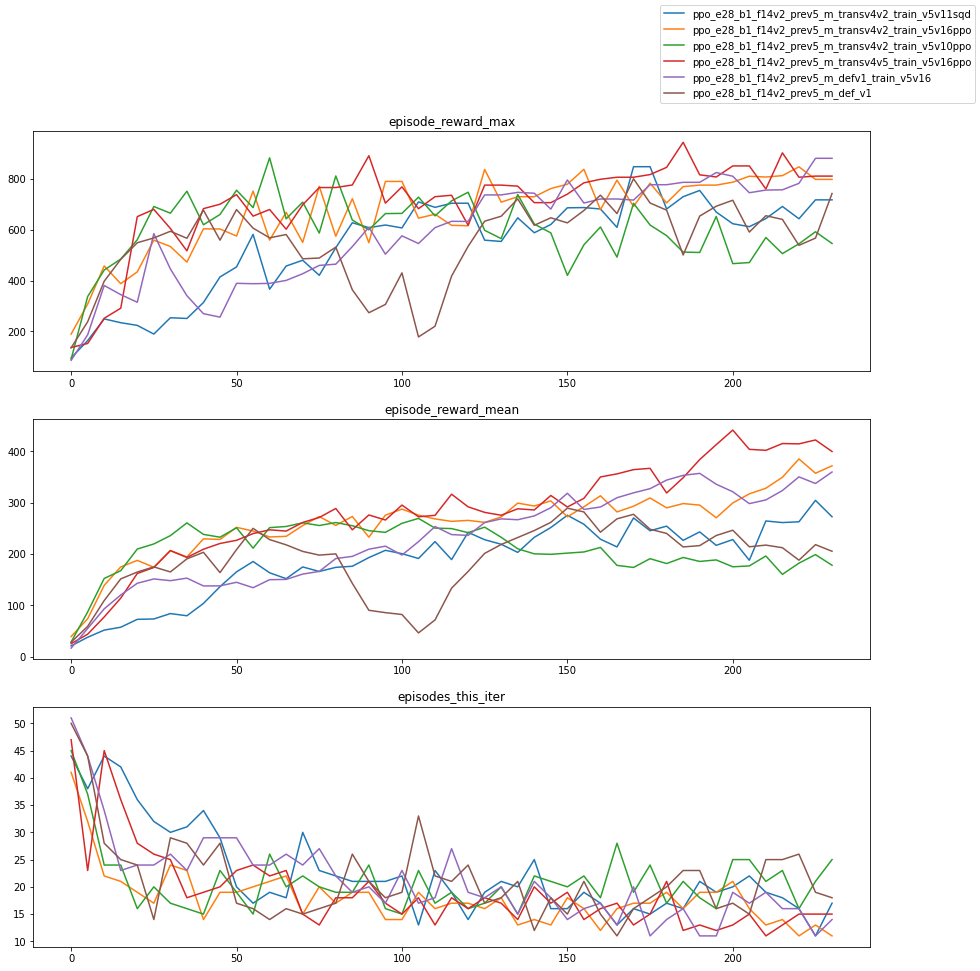

In [12]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/"
experiments_list = ["ppo_e28_b1_f14v2_prev5_m_def_v1",  # FCN со старыми параметрами
                       #"ppo_e28_b1_f14v2_prev5_m_trans_v4v2", # train_batch_size = 6000 sgd_minibatch_size = 256 - трансформер с теми же параметрами хреново обучился
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v6sqd", # train_batch_size = 10000 sgd_minibatch_size = 512  # - больший батч не помог
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v10ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.001
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v11sqd", # train_batch_size = 6000 sgd_minibatch_size = 256 lr = .00001
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v12ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.01 lambda = 0.5  # lambda 0.5 - не очень, велью лосс должен быть больше или соизмерим с полиси лосом
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v13ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.01 lambda = 0.1  # lambda 0.1 - плохо
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v14ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.1 lambda = 0.5  # lambda 0.5 - не очень
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v15ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.1 lambda = 0.1  # lambda 0.1 - плохо
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v16ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 lr = .00001 vf_loss_coeff = 0.001  # внезапно хуже чем только низкий ЛР или только низкие коэф
                       #"ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v17ppo", # train_batch_size = 6000 sgd_minibatch_size = 256 vf_loss_coeff = 0.0001  # - хуже чем 0.001
                       "ppo_e28_b1_f14v2_prev5_m_transv4v5_train_v5v16ppo",
                       "ppo_e28_b1_f14v2_prev5_m_defv1_train_v5v16",
                       #"ppo_e28_b1_f14v2_prev5_m_raytrans_train_v5v16ppo"  # - реевский трансформер - херня, и в нан свалился. надо параметры доподбирать.
                    # можно ещё попробовать совместить лямбду 0.5 ЛР и коэф.
                      ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episodes_this_iter'], max_step=235, step_size=5)


In [3]:
import tensorflow as tf
tf.__version__

'2.6.0'

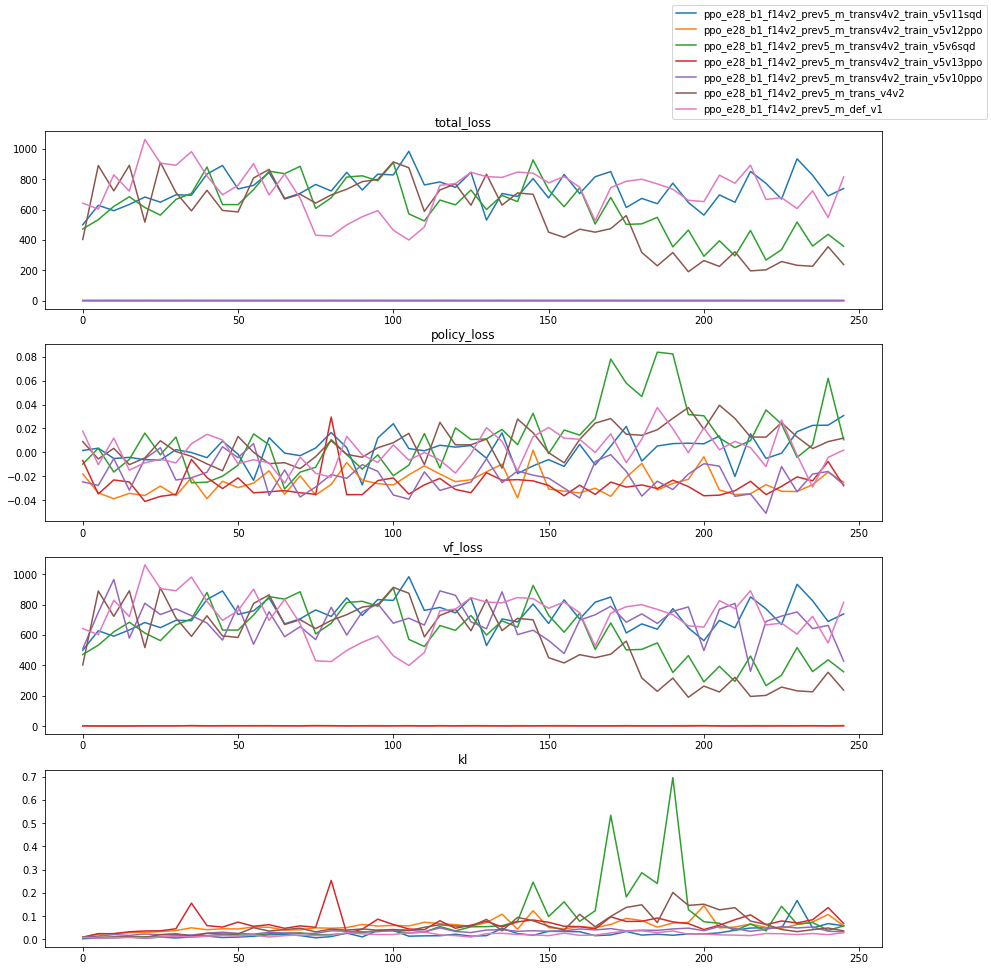

In [50]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/env28/PPO/"
experiments_list = ["ppo_e28_b1_f14v2_prev5_m_def_v1",
                       "ppo_e28_b1_f14v2_prev5_m_trans_v4v2",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v6sqd",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v10ppo",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v11sqd",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v12ppo",
                       "ppo_e28_b1_f14v2_prev5_m_transv4v2_train_v5v13ppo"
                      ]
metrics = ["info/learner/default_policy/learner_stats/total_loss",
           "info/learner/default_policy/learner_stats/policy_loss",
           "info/learner/default_policy/learner_stats/vf_loss",
           #"info/learner/default_policy/learner_stats/vf_explained_var",
           "info/learner/default_policy/learner_stats/kl",
           #"info/learner/default_policy/learner_stats/entropy"
          ]
metric_names = [
    "total_loss",
    "policy_loss",
    "vf_loss",
    #"vf_explained_var",
    "kl",
    #"entropy"
]
DrawMetrics(base_dir, experiments_list, metrics=metrics, metric_names=metric_names, max_step=250, step_size=5)


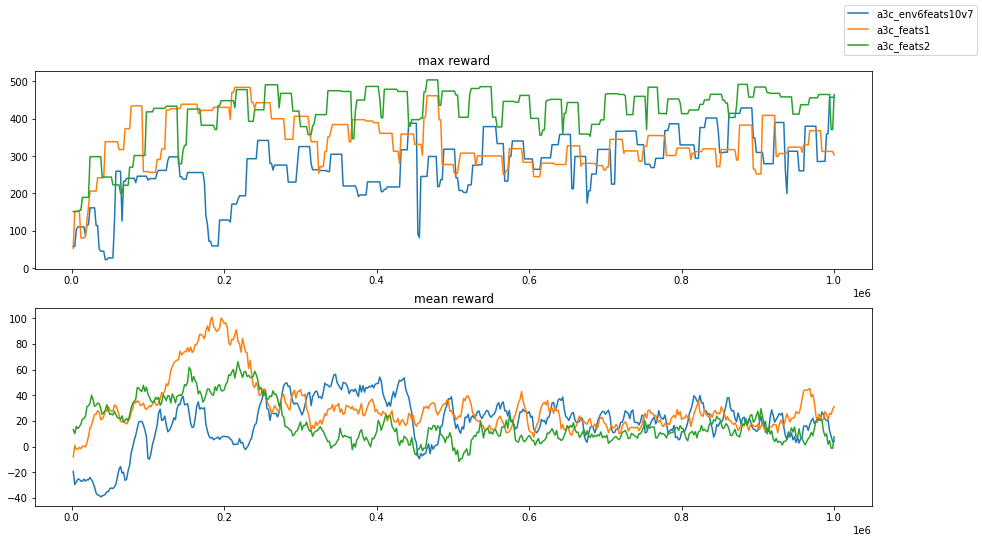

In [8]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS_disc/A3C/feats/"
fig, axes  = plt.subplots(2,1)
for root, dirs, files in os.walk(base_dir):
    if "progress.csv" not in files:
        continue
    expName = root.split("/")[-2]
    if expName in ["a3c_arch3", "a3c_arch4"]:
        continue
    try:
        df = pd.read_csv(root+"/progress.csv")
        axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label=expName)
        axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
        #axes[2].plot(df["timesteps_total"], df["episode_reward_min"])
    except pd.errors.EmptyDataError as ede:
        print(root)
        print("Empty data. " + str(ede))
        print()
    except KeyError as ke:
        print(root)
        print("no key " + str(ke))
        print()
#df = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS_disc/A3C/)
#axes[0].plot(df["timesteps_total"], df["episode_reward_max"], label="default a3c")
#axes[1].plot(df["timesteps_total"], df["episode_reward_mean"])
axes[0].set_title("max reward")
axes[1].set_title("mean reward")
fig.set_size_inches(15,8)
fig.legend()
plt.show()

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_tv5v20/PPO_continuous-grid_5e63c_00002_2_2023-07-28_20-51-59
Empty data. No columns to parse from file



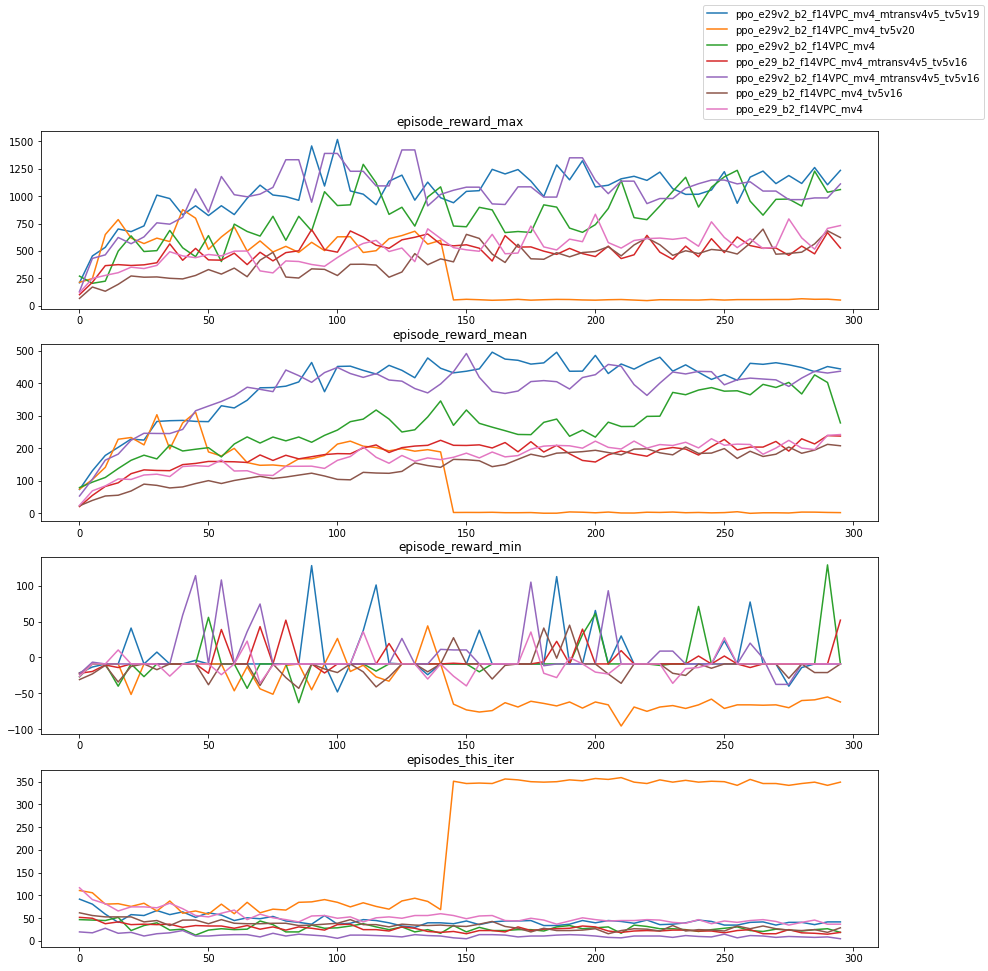

In [87]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/"
experiments_list = [#"ppo_e29_b1_f14VPC_ar","ppo_e29_b1_f14VPC_mv4",
                    #"ppo_e29_b2_f14VPC_ar",
                    "ppo_e29_b2_f14VPC_mv4",
                    "ppo_e29_b2_f14VPC_mv4_tv5v16",
                    "ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16",
                    "ppo_e29v2_b2_f14VPC_mv4",
                    "ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v16"
                    "ppo_e29v2_b2_f14VPC_mv4",
                    "ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v16",
                    "ppo_e29v2_b2_f14VPC_mv4_tv5v20",
                    "ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19"
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episode_reward_min', 'episodes_this_iter'], max_step=300, step_size=5)


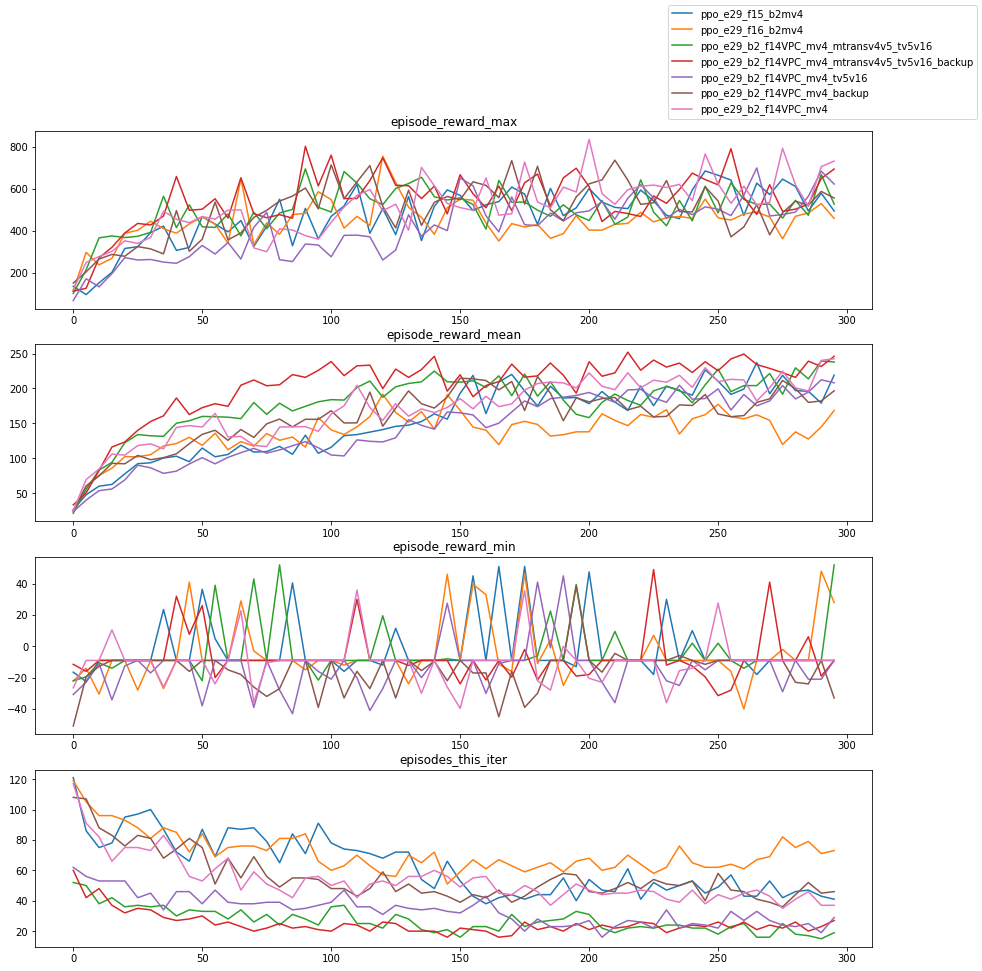

In [5]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/"
experiments_list = [#"ppo_e29_b1_f14VPC_ar","ppo_e29_b1_f14VPC_mv4",
                    #"ppo_e29_b2_f14VPC_ar",
                    "ppo_e29_b2_f14VPC_mv4",
                    "ppo_e29_b2_f14VPC_mv4_backup",
                    "ppo_e29_b2_f14VPC_mv4_tv5v16",                    
                    "ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16",   
                    "ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16_backup",
                    "ppo_e29_f15_b2mv4",
                    "ppo_e29_f16_b2mv4"
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episode_reward_min', 'episodes_this_iter'], max_step=300, step_size=5)


In [38]:
import pandas as pd
total_table = []
test_table_paths = [
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_backup/PPO_continuous-grid_399ae_00000_0_2023-07-21_14-24-58/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_backup/PPO_continuous-grid_399ae_00000_0_2023-07-21_14-24-58/checkpoint-275_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_backup/PPO_continuous-grid_399ae_00000_0_2023-07-21_14-24-58/checkpoint-300_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4/PPO_continuous-grid_d58fc_00000_0_2023-07-29_01-41-04/checkpoint-200_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4/PPO_continuous-grid_d58fc_00000_0_2023-07-29_01-41-04/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4/PPO_continuous-grid_d58fc_00000_0_2023-07-29_01-41-04/checkpoint-300_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_tv5v16/PPO_continuous-grid_e56c7_00000_0_2023-07-20_18-05-42/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_tv5v16/PPO_continuous-grid_e56c7_00000_0_2023-07-20_18-05-42/checkpoint-275_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/default_model/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_tv5v16/PPO_continuous-grid_e56c7_00000_0_2023-07-20_18-05-42/checkpoint-300_test.csv",
    #"/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16_backup/PPO_continuous-grid_d58fc_00001_1_2023-07-29_01-41-27/checkpoint-200_test.csv",
    #"/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16_backup/PPO_continuous-grid_d58fc_00001_1_2023-07-29_01-41-27/checkpoint-250_test.csv",
    #"/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16_backup/PPO_continuous-grid_d58fc_00001_1_2023-07-29_01-41-27/checkpoint-300_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16/PPO_continuous-grid_d58fc_00001_1_2023-07-29_01-41-27/checkpoint-200_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16/PPO_continuous-grid_d58fc_00001_1_2023-07-29_01-41-27/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16/PPO_continuous-grid_d58fc_00001_1_2023-07-29_01-41-27/checkpoint-300_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/e29_f15_b2mv4/PPO/default_model/feats_v15/bear2/ppo_e29_f15_b2mv4/PPO_continuous-grid_ad0a6_00000_0_2023-08-08_20-26-14/checkpoint-200_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/e29_f15_b2mv4/PPO/default_model/feats_v15/bear2/ppo_e29_f15_b2mv4/PPO_continuous-grid_ad0a6_00000_0_2023-08-08_20-26-14/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/e29_f15_b2mv4/PPO/default_model/feats_v15/bear2/ppo_e29_f15_b2mv4/PPO_continuous-grid_ad0a6_00000_0_2023-08-08_20-26-14/checkpoint-275_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/e29_f15_b2mv4/PPO/default_model/feats_v15/bear2/ppo_e29_f15_b2mv4/PPO_continuous-grid_ad0a6_00000_0_2023-08-08_20-26-14/checkpoint-300_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/e29_f15_b2mv4/PPO/default_model/feats_v15/bear2/ppo_e29_f16_b2mv4/PPO_continuous-grid_ad0b4_00000_0_2023-08-08_20-26-14/checkpoint-200_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/e29_f15_b2mv4/PPO/default_model/feats_v15/bear2/ppo_e29_f16_b2mv4/PPO_continuous-grid_ad0b4_00000_0_2023-08-08_20-26-14/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/e29_f15_b2mv4/PPO/default_model/feats_v15/bear2/ppo_e29_f16_b2mv4/PPO_continuous-grid_ad0b4_00000_0_2023-08-08_20-26-14/checkpoint-275_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/e29_f15_b2mv4/PPO/default_model/feats_v15/bear2/ppo_e29_f16_b2mv4/PPO_continuous-grid_ad0b4_00000_0_2023-08-08_20-26-14/checkpoint-300_test.csv",
    
]
total_table = []
for path in test_table_paths:
    total_table.append({
        "exp": path.split("/")[-3],
        "checkpoint": path.split("/")[-1]
    })
    df = pd.read_csv(path, sep=";")
    total_table[-1].update(df["mission_status"].value_counts())
total_table = pd.DataFrame(total_table)
total_table["sum"] = total_table.loc[:,["fail", "success", "in_progress", "finished_by_time"]].sum(axis=1)
total_table

exp               checkpoint  fail  \
0              ppo_e29_b2_f14VPC_mv4_backup  checkpoint-250_test.csv    53   
1              ppo_e29_b2_f14VPC_mv4_backup  checkpoint-275_test.csv    65   
2              ppo_e29_b2_f14VPC_mv4_backup  checkpoint-300_test.csv    72   
3                     ppo_e29_b2_f14VPC_mv4  checkpoint-200_test.csv    80   
4                     ppo_e29_b2_f14VPC_mv4  checkpoint-250_test.csv    66   
5                     ppo_e29_b2_f14VPC_mv4  checkpoint-300_test.csv    76   
6              ppo_e29_b2_f14VPC_mv4_tv5v16  checkpoint-250_test.csv    80   
7              ppo_e29_b2_f14VPC_mv4_tv5v16  checkpoint-275_test.csv    71   
8              ppo_e29_b2_f14VPC_mv4_tv5v16  checkpoint-300_test.csv    12   
9   ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16  checkpoint-200_test.csv    89   
10  ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16  checkpoint-250_test.csv    66   
11  ppo_e29_b2_f14VPC_mv4_mtransv4v5_tv5v16  checkpoint-300_test.csv    59   
12                        ppo_e29_f15_b2mv4  checkpoint-200_test.csv    12   
13                        ppo_e29_f15_b2mv4  checkpoint-250_test.csv    75   
14                        ppo_e29_f15_b2mv4  checkpoint-275_test.csv    78   
15                        ppo_e29_f15_b2mv4  checkpoint-300_test.csv    64   
16                        ppo_e29_f16_b2mv4  checkpoint-200_test.csv    91   
17                        ppo_e29_f16_b2mv4  checkpoint-250_test.csv    89   
18                        ppo_e29_f16_b2mv4  checkpoint-275_test.csv    92   
19                        ppo_e29_f16_b2mv4  checkpoint-300_test.csv    85   

    success  in_progress  finished_by_time    sum  
0      26.0           14               7.0  100.0  
1      22.0           10               3.0  100.0  
2      22.0            3               3.0  100.0  
3       9.0            8               3.0  100.0  
4      23.0            8               3.0  100.0  
5      17.0            5               2.0  100.0  
6       9.0            9               2.0  100.0  
7      11.0           13               5.0  100.0  
8       1.0            1               3.0   17.0  
9       5.0            6               NaN  100.0  
10     20.0            6               8.0  100.0  
11     21.0            8              12.0  100.0  
12      2.0            1               NaN   15.0  
13     13.0           11               1.0  100.0  
14      6.0           16               NaN  100.0  
15     24.0            7               5.0  100.0  
16      NaN            9               NaN  100.0  
17      NaN           10               1.0  100.0  
18      NaN            7               1.0  100.0  
19      2.0           13               NaN  100.0

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e29/PPO/fv17v5/ppo_e29_fv17v5/PPO_continuous-grid_c50ed_00000_0_2023-09-05_18-42-07
no key '[215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295] not in index'

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e29/PPO/fv17v6/ppo_e29_fv17v6/PPO_continuous-grid_ffbee_00000_0_2023-09-05_18-43-46
no key '[200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295] not in index'



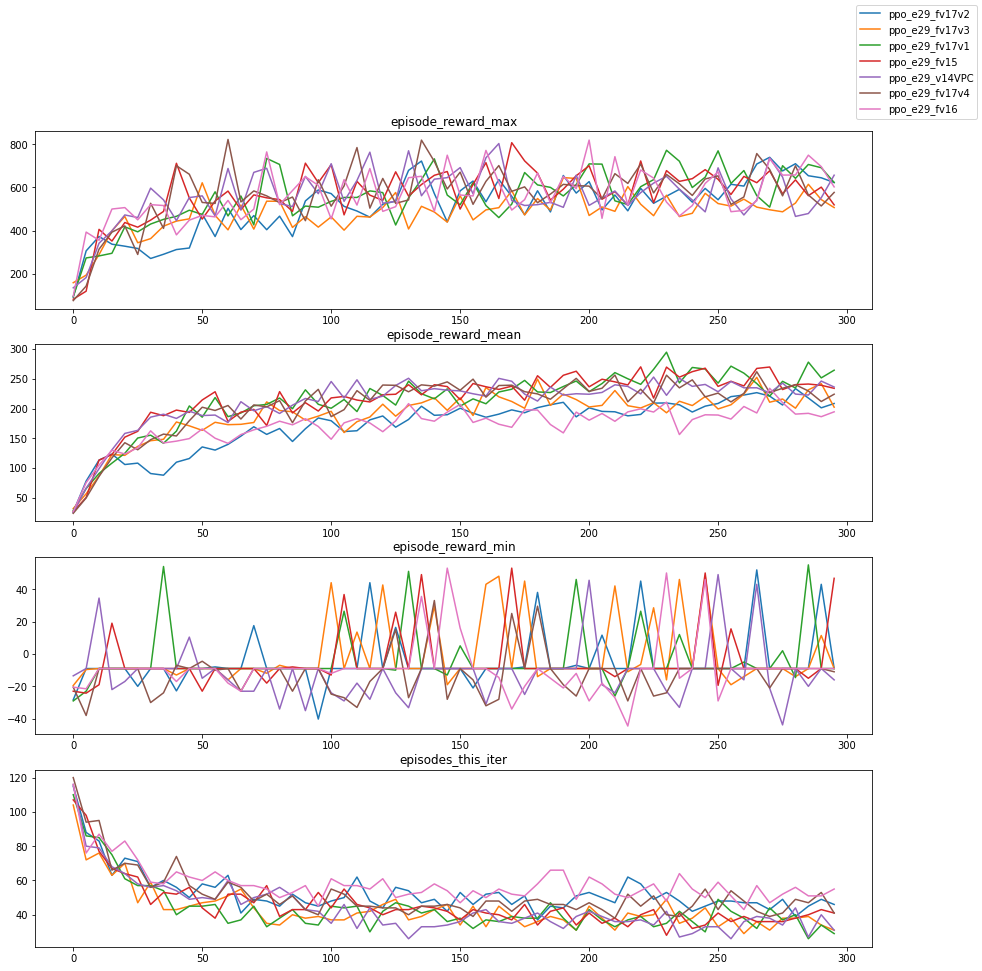

In [3]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e29/"
experiments_list = ["ppo_e29_v14VPC",
                    "ppo_e29_fv15",
                    "ppo_e29_fv16",
                    "ppo_e29_fv17v1",
                    "ppo_e29_fv17v2",
                    "ppo_e29_fv17v3",
                    "ppo_e29_fv17v4",
                    "ppo_e29_fv17v5",
                    "ppo_e29_fv17v6"
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episode_reward_min', 'episodes_this_iter'], max_step=300, step_size=5)


In [19]:
import pandas as pd
import re
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e29/"
experiments_list = ["ppo_e29_v14VPC",
                    "ppo_e29_fv15",
                    "ppo_e29_fv16",
                    "ppo_e29_fv17v1",
                    "ppo_e29_fv17v2",
                    "ppo_e29_fv17v3",
                    "ppo_e29_fv17v4",
                    "ppo_e29_fv17v5",
                    "ppo_e29_fv17v6"
                   ]
total_table = []
for root, dirs, files in os.walk(base_dir):
    expName = root.split("/")[-2]
    if expName in experiments_list:
        for fName in files:
            if "checkpoint-" in fName and ".csv" in fName and "~" not in fName:
                checkpoint_n = float(re.search("\d+", fName).group())
                df = pd.read_csv(root + "/" + fName, sep=";")
                df = df.iloc[:100]
                #assert len(df)==101
                total_table.append({
                    "exp_name": expName,
                    "checkpoint": checkpoint_n,
                    "success_count": sum(df["mission_status"].isin(["success", "finished_by_time"])),
                    "tested_seeds": len(df)
                })
total_table = pd.DataFrame(total_table)
#total_table = total_table[total_table["checkpoint"].map(lambda x: x%10==0)]
total_table.sort_values(["exp_name","checkpoint"], inplace=True)
groupby = total_table.groupby("exp_name")
groupby.mean()

checkpoint  success_count  tested_seeds
exp_name                                               
ppo_e29_fv15         250.0      10.272727         100.0
ppo_e29_fv16         230.0       2.714286         100.0
ppo_e29_fv17v1       250.0      21.000000         100.0
ppo_e29_fv17v2       225.0       4.666667         100.0
ppo_e29_fv17v3       250.0      19.727273         100.0
ppo_e29_fv17v4       250.0       4.000000         100.0
ppo_e29_v14VPC       250.0      25.181818         100.0

In [5]:
total_table[total_table["exp_name"]=="ppo_e29_v14VPC"]

exp_name  checkpoint  success_count  tested_seeds
81  ppo_e29_v14VPC       200.0             31           100
77  ppo_e29_v14VPC       205.0             27           100
90  ppo_e29_v14VPC       210.0             27           100
80  ppo_e29_v14VPC       215.0             22           100
78  ppo_e29_v14VPC       220.0             25           100
91  ppo_e29_v14VPC       225.0             23           100
86  ppo_e29_v14VPC       230.0             24           100
94  ppo_e29_v14VPC       235.0             25           100
83  ppo_e29_v14VPC       240.0             23           100
76  ppo_e29_v14VPC       245.0             21           100
84  ppo_e29_v14VPC       250.0             23           100
89  ppo_e29_v14VPC       255.0             27           100
74  ppo_e29_v14VPC       260.0             29           100
92  ppo_e29_v14VPC       265.0             19           100
87  ppo_e29_v14VPC       270.0             21           100
88  ppo_e29_v14VPC       275.0             22           100
85  ppo_e29_v14VPC       280.0             23           100
93  ppo_e29_v14VPC       285.0             21           100
79  ppo_e29_v14VPC       290.0             24           100
82  ppo_e29_v14VPC       295.0             18           100
75  ppo_e29_v14VPC       300.0             27           100

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v3_b2_f14VPC_mv4_tv5v20/PPO_continuous-grid_5e649_00001_1_2023-07-28_20-51-45
Empty data. No columns to parse from file



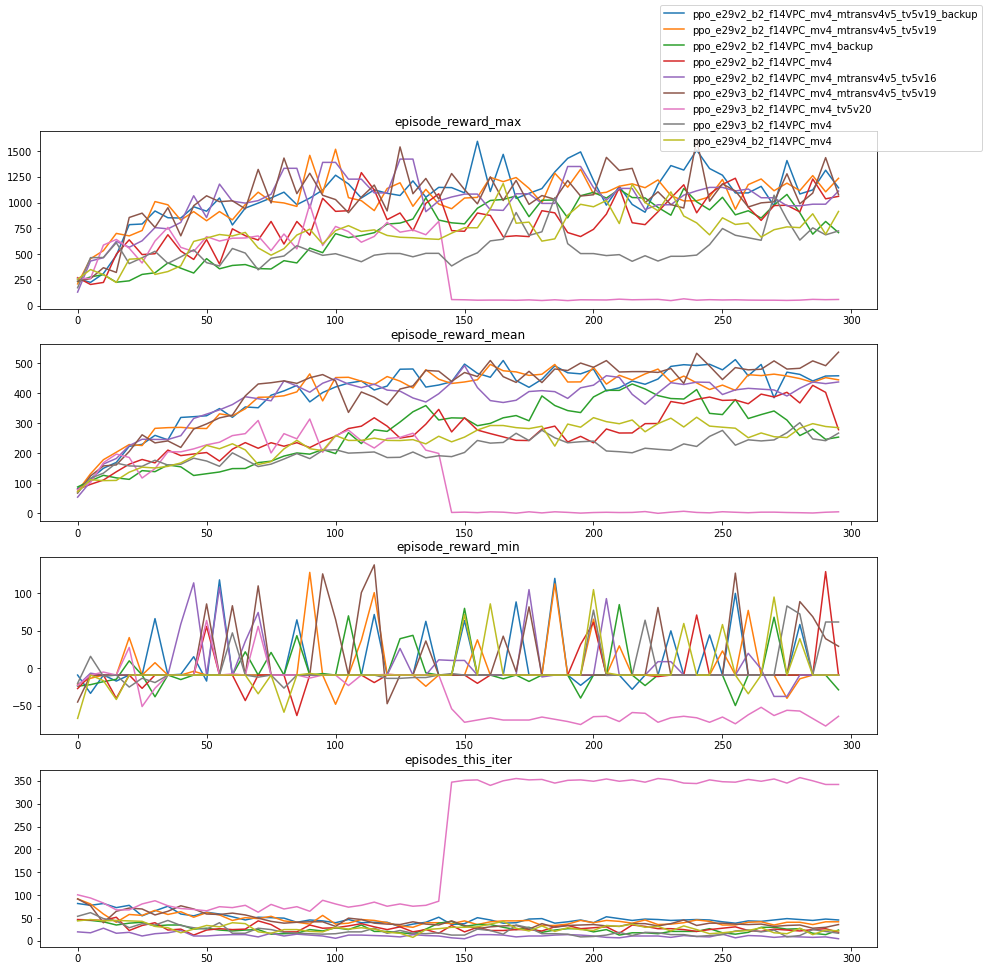

In [58]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/"
experiments_list = ["ppo_e29v2_b2_f14VPC_mv4",
                    "ppo_e29v2_b2_f14VPC_mv4_backup",
                    "ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v16",
                    #"ppo_e29v2_b2_f14VPC_mv4_tv5v20",  # ломаются
                    #"ppo_e29v2_b2_f14VPC_mv4_tv5v20_backup",  # ломаются 
                    "ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19",
                    "ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19_backup",
                    "ppo_e29v3_b2_f14VPC_mv4",
                    "ppo_e29v3_b2_f14VPC_mv4_tv5v20",  # ломаются
                    "ppo_e29v3_b2_f14VPC_mv4_mtransv4v5_tv5v19",
                    "ppo_e29v4_b2_f14VPC_mv4",
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episode_reward_min', 'episodes_this_iter'], max_step=300, step_size=5)


In [46]:
import pandas as pd
test_table_paths = [
    #"/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4/PPO_continuous-grid_f920b_00000_0_2023-07-31_14-25-37/checkpoint-"
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_backup/PPO_continuous-grid_e1e7b_00000_0_2023-07-25_16-40-57/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_backup/PPO_continuous-grid_e1e7b_00000_0_2023-07-25_16-40-57/checkpoint-275_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/default_model/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_backup/PPO_continuous-grid_e1e7b_00000_0_2023-07-25_16-40-57/checkpoint-300_test.csv",
    #"/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29/PPO/trans/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v16/PPO_continuous-grid_e1e7b_00001_1_2023-07-25_16-41-33/checkpoint-",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/trans/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19/PPO_continuous-grid_d5927_00000_0_2023-07-29_01-41-04/checkpoint-200_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/trans/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19/PPO_continuous-grid_d5927_00000_0_2023-07-29_01-41-04/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/trans/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19/PPO_continuous-grid_d5927_00000_0_2023-07-29_01-41-04/checkpoint-300_test.csv",
    #"/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v2/PPO/trans/feats_v14VPC/bear2/ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19_backup/PPO_continuous-grid_6ba8b_00001_1_2023-07-26_16-58-30/checkpoint-",
    #"/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v3/PPO/default_model/feats_v14VPC/bear2/ppo_e29v3_b2_f14VPC_mv4/PPO_continuous-grid_bb9c8_00000_0_2023-07-31_13-12-20/checkpoint-",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v3/PPO/trans/feats_v14VPC/bear2/ppo_e29v3_b2_f14VPC_mv4_mtransv4v5_tv5v19/PPO_continuous-grid_d5927_00002_2_2023-07-29_01-41-50/checkpoint-200_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v3/PPO/trans/feats_v14VPC/bear2/ppo_e29v3_b2_f14VPC_mv4_mtransv4v5_tv5v19/PPO_continuous-grid_d5927_00002_2_2023-07-29_01-41-50/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v3/PPO/trans/feats_v14VPC/bear2/ppo_e29v3_b2_f14VPC_mv4_mtransv4v5_tv5v19/PPO_continuous-grid_d5927_00002_2_2023-07-29_01-41-50/checkpoint-300_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v4/PPO/default_model/feats_v14VPC/bear2/ppo_e29v4_b2_f14VPC_mv4/PPO_continuous-grid_579ef_00000_0_2023-08-10_13-04-49/checkpoint-200_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v4/PPO/default_model/feats_v14VPC/bear2/ppo_e29v4_b2_f14VPC_mv4/PPO_continuous-grid_579ef_00000_0_2023-08-10_13-04-49/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v4/PPO/default_model/feats_v14VPC/bear2/ppo_e29v4_b2_f14VPC_mv4/PPO_continuous-grid_579ef_00000_0_2023-08-10_13-04-49/checkpoint-275_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v4/PPO/default_model/feats_v14VPC/bear2/ppo_e29v4_b2_f14VPC_mv4/PPO_continuous-grid_579ef_00000_0_2023-08-10_13-04-49/checkpoint-300_test.csv",
]
total_table = []
for path in test_table_paths:
    total_table.append({
        "exp": path.split("/")[-3],
        "checkpoint": path.split("/")[-1]
    })
    df = pd.read_csv(path, sep=";")
    total_table[-1].update(df["mission_status"].value_counts())
total_table = pd.DataFrame(total_table)
total_table["sum"] = total_table.loc[:,["fail", "success", "in_progress", "finished_by_time"]].sum(axis=1)
total_table

exp               checkpoint  fail  \
0              ppo_e29v2_b2_f14VPC_mv4_backup  checkpoint-250_test.csv    79   
1              ppo_e29v2_b2_f14VPC_mv4_backup  checkpoint-275_test.csv    66   
2              ppo_e29v2_b2_f14VPC_mv4_backup  checkpoint-300_test.csv    67   
3   ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19  checkpoint-200_test.csv    72   
4   ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19  checkpoint-250_test.csv    64   
5   ppo_e29v2_b2_f14VPC_mv4_mtransv4v5_tv5v19  checkpoint-300_test.csv    81   
6   ppo_e29v3_b2_f14VPC_mv4_mtransv4v5_tv5v19  checkpoint-200_test.csv    62   
7   ppo_e29v3_b2_f14VPC_mv4_mtransv4v5_tv5v19  checkpoint-250_test.csv    79   
8   ppo_e29v3_b2_f14VPC_mv4_mtransv4v5_tv5v19  checkpoint-300_test.csv    76   
9                     ppo_e29v4_b2_f14VPC_mv4  checkpoint-200_test.csv    86   
10                    ppo_e29v4_b2_f14VPC_mv4  checkpoint-250_test.csv    76   
11                    ppo_e29v4_b2_f14VPC_mv4  checkpoint-275_test.csv    48   
12                    ppo_e29v4_b2_f14VPC_mv4  checkpoint-300_test.csv    61   

    in_progress  finished_by_time  success    sum  
0             9               7.0        5  100.0  
1            14              10.0       10  100.0  
2             8              20.0        5  100.0  
3             7               1.0       20  100.0  
4            17               4.0       15  100.0  
5             9               NaN       10  100.0  
6             9               8.0       21  100.0  
7             8               2.0       11  100.0  
8             9               3.0       12  100.0  
9             2               4.0        8  100.0  
10            7               9.0        8  100.0  
11           12              27.0       13  100.0  
12            7              26.0        6  100.0

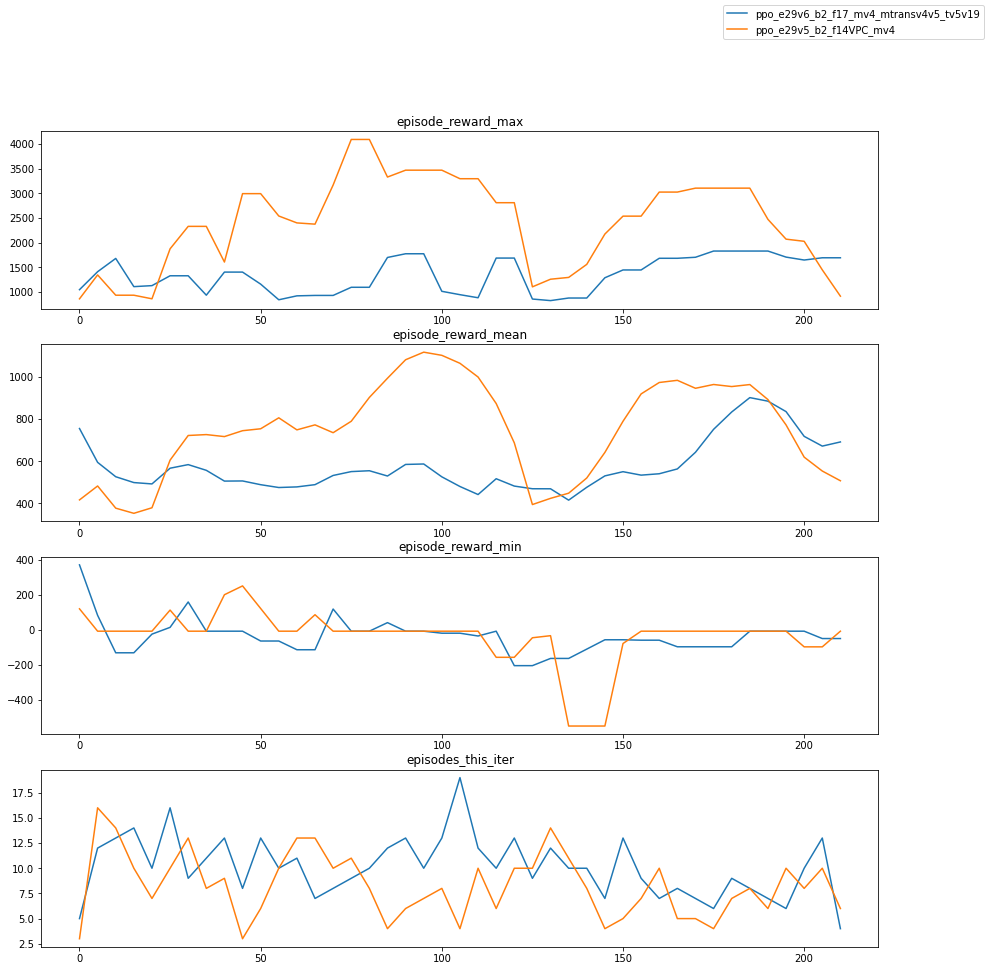

In [4]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/"
experiments_list = [
                    "ppo_e29v5_b2_f14VPC_mv4",
                    "ppo_e29v6_b2_f17_mv4_mtransv4v5_tv5v19"
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episode_reward_min', 'episodes_this_iter'], max_step=215, step_size=5)


In [70]:
import pandas as pd
test_table_paths = [
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v4/PPO/default_model/feats_v14VPC/bear2/ppo_e29v5_b2_f14VPC_mv4/PPO_continuous-grid_b1e3f_00000_0_2023-08-14_01-13-57/checkpoint-200_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v4/PPO/default_model/feats_v14VPC/bear2/ppo_e29v5_b2_f14VPC_mv4/PPO_continuous-grid_b1e3f_00000_0_2023-08-14_01-13-57/checkpoint-250_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v4/PPO/default_model/feats_v14VPC/bear2/ppo_e29v5_b2_f14VPC_mv4/PPO_continuous-grid_b1e3f_00000_0_2023-08-14_01-13-57/checkpoint-275_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_test_sensors/env29v4/PPO/default_model/feats_v14VPC/bear2/ppo_e29v5_b2_f14VPC_mv4/PPO_continuous-grid_b1e3f_00000_0_2023-08-14_01-13-57/checkpoint-300_test.csv"
]
total_table = []
for path in test_table_paths:
    total_table.append({
        "exp": path.split("/")[-3],
        "checkpoint": path.split("/")[-1]
    })
    df = pd.read_csv(path, sep=";")
    total_table[-1].update(df["mission_status"].value_counts())
total_table = pd.DataFrame(total_table)
total_table["sum"] = total_table.loc[:,["fail", "finished_by_time"]].sum(axis=1) # "success", "in_progress", 
total_table

exp               checkpoint  fail  finished_by_time  \
0  ppo_e29v5_b2_f14VPC_mv4  checkpoint-200_test.csv   100               NaN   
1  ppo_e29v5_b2_f14VPC_mv4  checkpoint-250_test.csv   100               NaN   
2  ppo_e29v5_b2_f14VPC_mv4  checkpoint-275_test.csv    99               1.0   
3  ppo_e29v5_b2_f14VPC_mv4  checkpoint-300_test.csv    88              10.0   

     sum  
0  100.0  
1  100.0  
2  100.0  
3   98.0

In [69]:
import pandas as pd
manual_runs = pd.read_csv("runs_results.csv", sep=";", encoding="cp1251")
runs_per_seed_count = manual_runs["seed"].value_counts()
(runs_per_seed_count==1).sum(), (runs_per_seed_count==2).sum()

(46, 28)

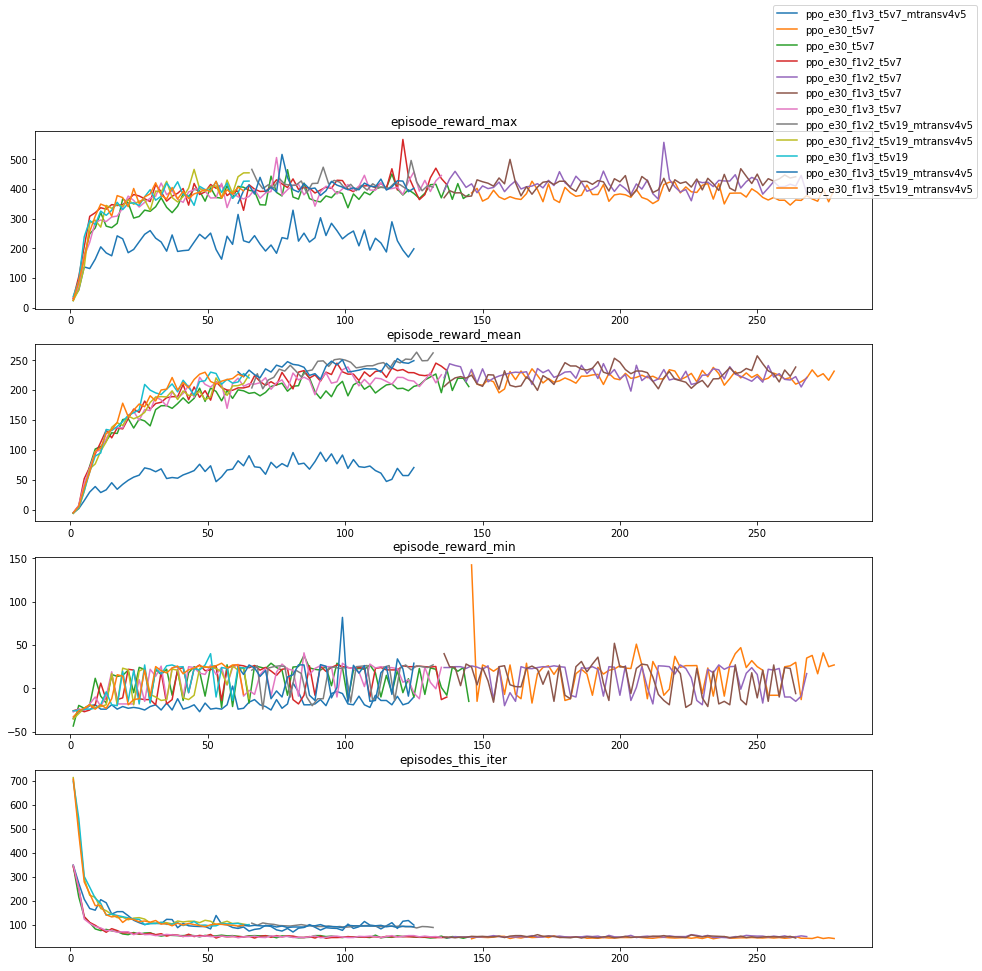

In [6]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/"
experiments_list = [#"ppo_e29_v14VPC",
                    "ppo_e30_t5v7",
                    #"ppo_e30v1_t5v7",
                    #"ppo_e30v2_t5v7",
                    "ppo_e30_f1v2_t5v7",
                    "ppo_e30_f1v3_t5v7",
                    "ppo_e30_f1v3_t5v19",
                    "ppo_e30_f1v2_t5v19_mtransv4v5",
                    "ppo_e30_f1v3_t5v19_mtransv4v5",
                    "ppo_e30_f1v3_t5v7_mtransv4v5"
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episode_reward_max", 'episode_reward_mean', 'episode_reward_min', 'episodes_this_iter'], x_axis="training_iteration", max_step=None, step_size=2)


In [107]:
import pandas as pd
test_table_paths = [
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_t5v7/PPO_continuous-grid_3a1e4_00000_0_2023-09-13_05-57-08/checkpoint-50_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_t5v7/PPO_continuous-grid_3a1e4_00000_0_2023-09-13_05-57-08/checkpoint-50_test_on35.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_t5v7/PPO_continuous-grid_3a1e4_00000_0_2023-09-13_05-57-08/checkpoint-50_test_on35_b5bigs2.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_t5v7/PPO_continuous-grid_3a1e4_00000_0_2023-09-13_05-57-08/checkpoint-50_test_on35_bbig.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_t5v7/PPO_continuous-grid_3a1e4_00000_0_2023-09-13_05-57-08/checkpoint-50_test_on35_bbigs2.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_f1v2_t5v7/PPO_continuous-grid_3c1bc_00000_0_2023-09-12_21-43-16/checkpoint-50_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_f1v2_t5v7/PPO_continuous-grid_3c1bc_00000_0_2023-09-12_21-43-16/checkpoint-40_test_ignore_this.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_f1v3_t5v7/PPO_continuous-grid_3c1bc_00001_1_2023-09-12_21-43-46/checkpoint-50_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30v1/PPO/ppo_e30v1_t5v7/PPO_continuous-grid_3a1e4_00001_1_2023-09-13_05-57-41/checkpoint-50_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30v2/PPO/ppo_e30v2_t5v7/PPO_continuous-grid_3a1e4_00002_2_2023-09-13_05-57-59/checkpoint-50_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_f1v2_t5v19_mtransv4v5/PPO_continuous-grid_41e56_00000_0_2023-09-12_21-43-25/checkpoint-50_test.csv",
    "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/e30/PPO/ppo_e30_f1v3_t5v19_mtransv4v5/PPO_continuous-grid_41e56_00001_1_2023-09-12_21-43-55/checkpoint-50_test.csv"
]
total_table = []
for path in test_table_paths:
    total_table.append({
        "exp": path.split("/")[-3],
        "checkpoint": path.split("/")[-1]
    })
    df = pd.read_csv(path, sep=";")
    total_table[-1].update(df["mission_status"].value_counts())
total_table = pd.DataFrame(total_table)
total_table["sum"] = total_table.loc[:,["fail", "success", "in_progress"]].sum(axis=1) # "success", "in_progress", 
total_table

exp                           checkpoint  \
0                    ppo_e30_t5v7               checkpoint-50_test.csv   
1                    ppo_e30_t5v7          checkpoint-50_test_on35.csv   
2                    ppo_e30_t5v7  checkpoint-50_test_on35_b5bigs2.csv   
3                    ppo_e30_t5v7     checkpoint-50_test_on35_bbig.csv   
4                    ppo_e30_t5v7   checkpoint-50_test_on35_bbigs2.csv   
5               ppo_e30_f1v2_t5v7               checkpoint-50_test.csv   
6               ppo_e30_f1v2_t5v7   checkpoint-40_test_ignore_this.csv   
7               ppo_e30_f1v3_t5v7               checkpoint-50_test.csv   
8                  ppo_e30v1_t5v7               checkpoint-50_test.csv   
9                  ppo_e30v2_t5v7               checkpoint-50_test.csv   
10  ppo_e30_f1v2_t5v19_mtransv4v5               checkpoint-50_test.csv   
11  ppo_e30_f1v3_t5v19_mtransv4v5               checkpoint-50_test.csv   

    success  fail  in_progress    sum  
0        56    38          6.0  100.0  
1        55    39          6.0  100.0  
2         2    93          5.0  100.0  
3        32    61          7.0  100.0  
4        14    81          5.0  100.0  
5        64    31          5.0  100.0  
6        53    43          4.0  100.0  
7        63    36          1.0  100.0  
8        88    12          NaN  100.0  
9        66    32          2.0  100.0  
10       42    51          7.0  100.0  
11       71    27          2.0  100.0

In [16]:
import pandas as pd
import re
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/"
experiments_list = ["ppo_e29_v14VPC",
                    "ppo_e30_t5v7",
                    "ppo_e30v1_t5v7",
                    "ppo_e30v2_t5v7",
                    "ppo_e30_f1v2_t5v7",
                    "ppo_e30_f1v3_t5v7",
                    "ppo_e30_f1v4_t5v7",
                    "ppo_e30_f1v5_t5v7",
                    "ppo_e30_f1v2_t5v19_mtransv4v5",
                    "ppo_e30_f1v3_t5v19_mtransv4v5"
                   ]
total_table = []
for root, dirs, files in os.walk(base_dir):
    expName = root.split("/")[-2]
    if expName in experiments_list:
        for fName in files:
            if "checkpoint-" in fName and ".csv" in fName and "~" not in fName:
                checkpoint_n = float(re.search("\d+", fName).group())
                test_type = re.search("(test_?.*)\\.csv", fName).group(1)
                df = pd.read_csv(root + "/" + fName, sep=";")
                df = df.iloc[:100]
                #assert len(df)==101
                total_table.append({
                    "exp_name": expName,
                    "test_type": test_type,
                    "checkpoint": checkpoint_n,
                    "success_count": sum(df["mission_status"].isin(["success", "finished_by_time"])),
                    "tested_seeds": len(df)
                })
total_table = pd.DataFrame(total_table)
#total_table = total_table[total_table["checkpoint"].map(lambda x: x%10==0)]
total_table.sort_values(["exp_name","checkpoint", "test_type"], inplace=True)
groupby = total_table.groupby(["exp_name", "test_type"])
groupby.mean()

checkpoint  success_count  \
exp_name                      test_type                                      
ppo_e29_v14VPC                test                    250.0      23.904762   
ppo_e30_f1v2_t5v19_mtransv4v5 test                     55.0      42.500000   
ppo_e30_f1v2_t5v7             test                     75.0      60.500000   
                              test_ignore_this         40.0      53.000000   
ppo_e30_f1v3_t5v19_mtransv4v5 test                     55.0      70.500000   
ppo_e30_f1v3_t5v7             test                     75.0      58.666667   
                              test_on35                75.0      66.500000   
                              test_on35_b5bigs2        75.0      55.833333   
                              test_on35_bbig           75.0      37.500000   
                              test_on35_bbigs2         75.0      66.666667   
ppo_e30_t5v7                  test                     75.0      58.500000   
                              test_on35                75.0      58.333333   
                              test_on35_b5bigs2        75.0       1.000000   
                              test_on35_bbig           75.0      35.333333   
                              test_on35_bbigs2         75.0      14.166667   
ppo_e30v1_t5v7                test                     75.0      92.500000   
ppo_e30v2_t5v7                test                     75.0      70.500000   

                                                 tested_seeds  
exp_name                      test_type                        
ppo_e29_v14VPC                test                      100.0  
ppo_e30_f1v2_t5v19_mtransv4v5 test                      100.0  
ppo_e30_f1v2_t5v7             test                      100.0  
                              test_ignore_this          100.0  
ppo_e30_f1v3_t5v19_mtransv4v5 test                      100.0  
ppo_e30_f1v3_t5v7             test                      100.0  
                              test_on35                 100.0  
                              test_on35_b5bigs2         100.0  
                              test_on35_bbig            100.0  
                              test_on35_bbigs2          100.0  
ppo_e30_t5v7                  test                      100.0  
                              test_on35                 100.0  
                              test_on35_b5bigs2         100.0  
                              test_on35_bbig            100.0  
                              test_on35_bbigs2          100.0  
ppo_e30v1_t5v7                test                      100.0  
ppo_e30v2_t5v7                test                      100.0

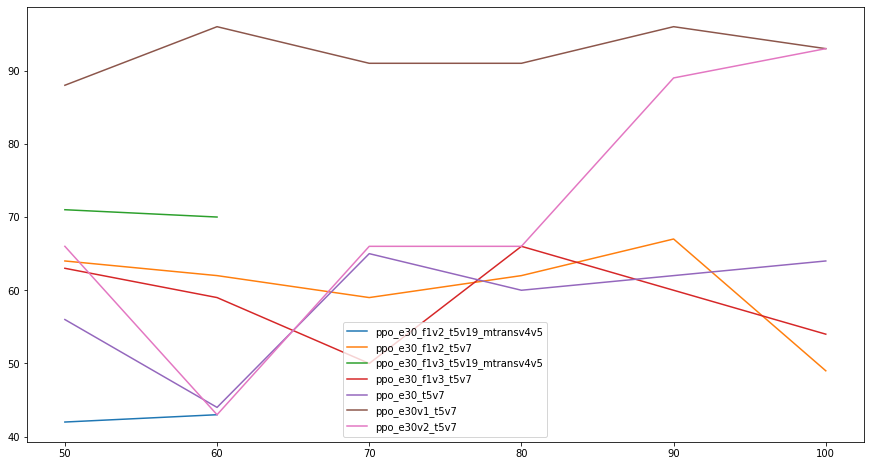

In [131]:

fig = plt.figure()
for exp_name in total_table["exp_name"].unique():
    if exp_name in ["ppo_e29_v14VPC"]:
        continue
    subdf = total_table[(total_table["exp_name"]==exp_name) & (total_table["test_type"]=="test")]
    plt.plot(subdf["checkpoint"], subdf["success_count"], label=exp_name)

plt.legend()
fig.set_size_inches(15, 8)
plt.show()

In [98]:
groupby.std()

checkpoint  success_count  \
exp_name                      test_type                                      
ppo_e29_v14VPC                test                31.024184       3.254301   
ppo_e30_f1v2_t5v19_mtransv4v5 test                 7.071068      12.727922   
ppo_e30_f1v2_t5v7             test                18.708287       6.220932   
                              test_ignore_this          NaN            NaN   
ppo_e30_f1v3_t5v19_mtransv4v5 test                 7.071068      26.162951   
ppo_e30_f1v3_t5v7             test                18.708287       5.853774   
                              test_on35           18.708287       5.089204   
                              test_on35_b5bigs2   18.708287      26.708925   
                              test_on35_bbig      18.708287       4.415880   
                              test_on35_bbigs2    18.708287       4.760952   
ppo_e30_t5v7                  test                18.708287       7.791020   
                              test_on35           18.708287       7.004760   
                              test_on35_b5bigs2   18.708287       0.632456   
                              test_on35_bbig      18.708287       4.179314   
                              test_on35_bbigs2    18.708287       3.250641   
ppo_e30v1_t5v7                test                18.708287       3.146427   
ppo_e30v2_t5v7                test                18.708287      18.251027   

                                                 tested_seeds  
exp_name                      test_type                        
ppo_e29_v14VPC                test                   0.000000  
ppo_e30_f1v2_t5v19_mtransv4v5 test                  27.577164  
ppo_e30_f1v2_t5v7             test                   0.000000  
                              test_ignore_this            NaN  
ppo_e30_f1v3_t5v19_mtransv4v5 test                  37.476659  
ppo_e30_f1v3_t5v7             test                   0.000000  
                              test_on35              0.000000  
                              test_on35_b5bigs2      0.000000  
                              test_on35_bbig         0.000000  
                              test_on35_bbigs2       0.000000  
ppo_e30_t5v7                  test                   0.000000  
                              test_on35              0.000000  
                              test_on35_b5bigs2      0.000000  
                              test_on35_bbig         0.000000  
                              test_on35_bbigs2       0.000000  
ppo_e30v1_t5v7                test                   0.000000  
ppo_e30v2_t5v7                test                   0.000000

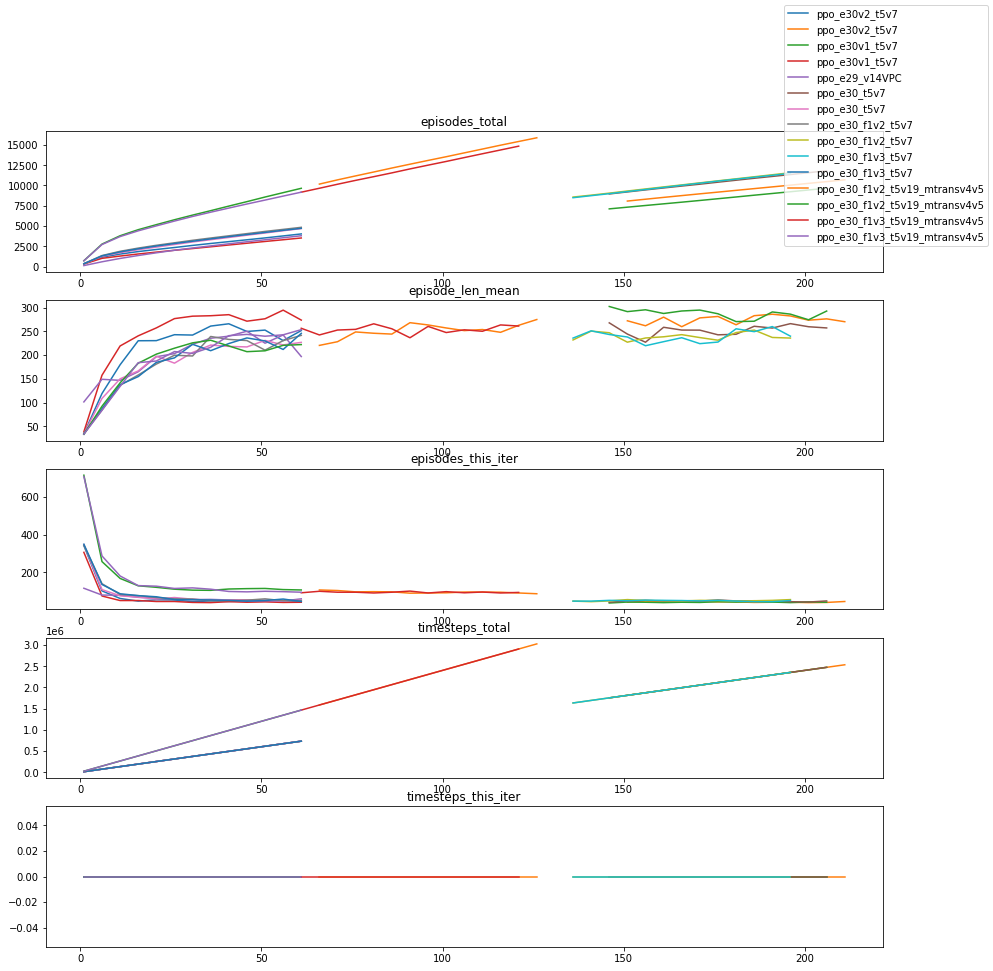

In [4]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/"
experiments_list = ["ppo_e29_v14VPC",
                    "ppo_e30_t5v7",
                    "ppo_e30v1_t5v7",
                    "ppo_e30v2_t5v7",
                    "ppo_e30_f1v2_t5v7",
                    "ppo_e30_f1v3_t5v7",
                    "ppo_e30_f1v4_t5v7",
                    "ppo_e30_f1v5_t5v7",
                    "ppo_e30_f1v2_t5v19_mtransv4v5",
                    "ppo_e30_f1v3_t5v19_mtransv4v5"
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["episodes_total", "episode_len_mean", 'episodes_this_iter', 'timesteps_total', "timesteps_this_iter"], max_step=65, step_size=5)


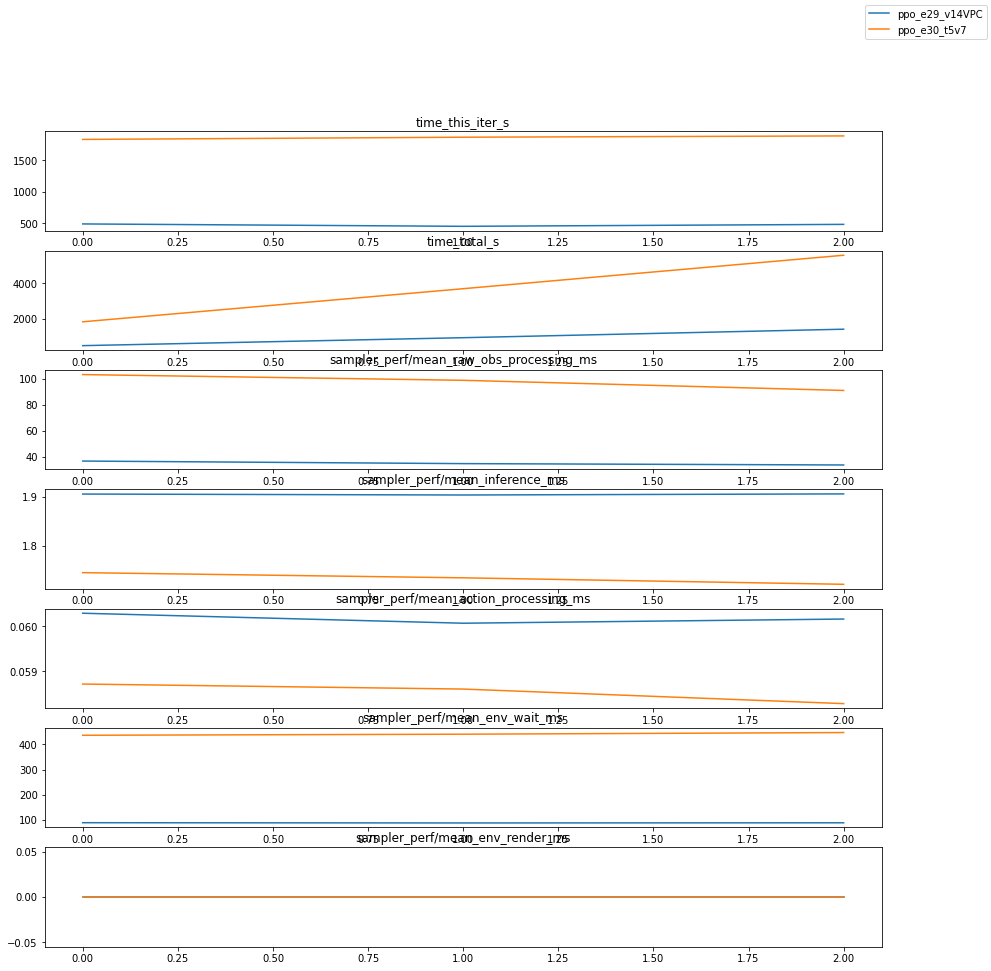

In [133]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/"
experiments_list = ["ppo_e29_v14VPC",
                    "ppo_e30_t5v7",
                    #"ppo_e30v1_t5v7",
                    #"ppo_e30v2_t5v7",
                    #"ppo_e30_f1v2_t5v7",
                    #"ppo_e30_f1v3_t5v7",
                    #"ppo_e30_f1v4_t5v7",
                    #"ppo_e30_f1v5_t5v7",
                    #"ppo_e30_f1v2_t5v19_mtransv4v5",
                    #"ppo_e30_f1v3_t5v19_mtransv4v5"
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["time_this_iter_s", 'time_total_s', 'sampler_perf/mean_raw_obs_processing_ms', "sampler_perf/mean_inference_ms",
                                                 "sampler_perf/mean_action_processing_ms", "sampler_perf/mean_env_wait_ms", "sampler_perf/mean_env_render_ms"], max_step=3, step_size=1)


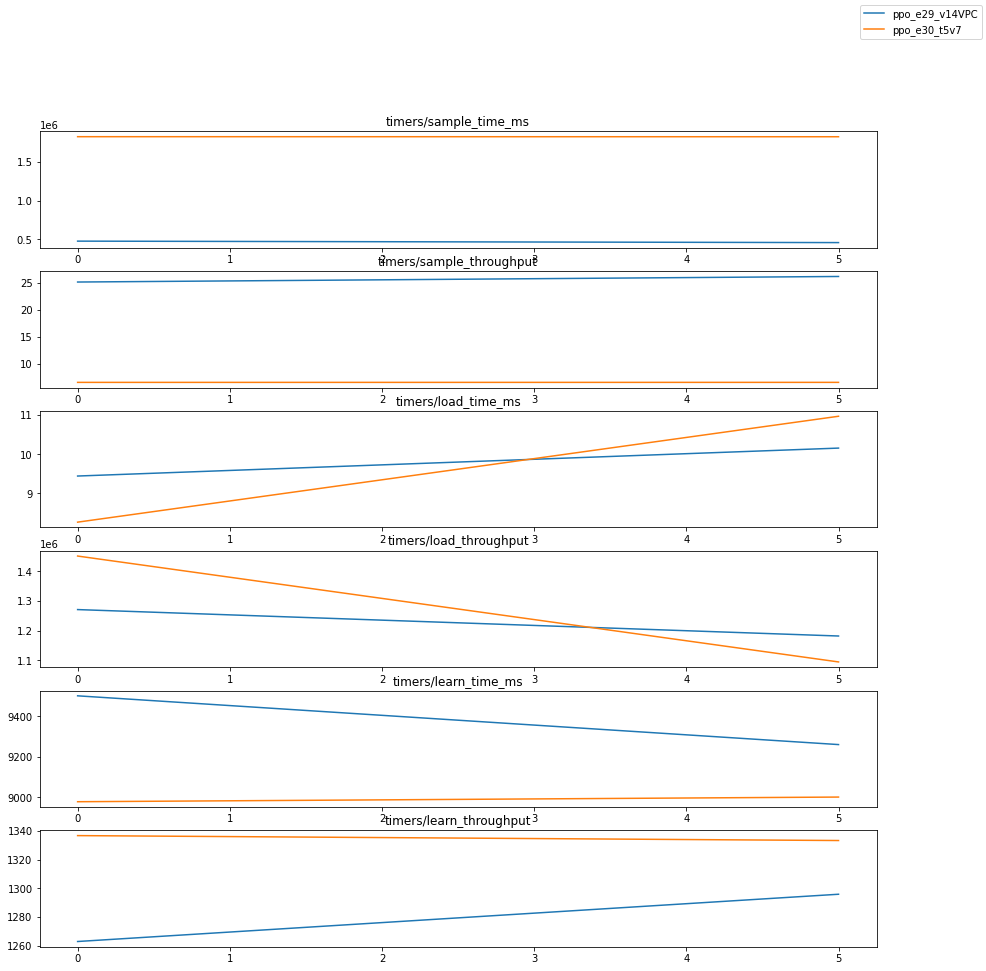

In [134]:
base_dir = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous_Prev/"
experiments_list = ["ppo_e29_v14VPC",
                    "ppo_e30_t5v7",
                    #"ppo_e30v1_t5v7",
                    #"ppo_e30v2_t5v7",
                    #"ppo_e30_f1v2_t5v7",
                    #"ppo_e30_f1v3_t5v7",
                    #"ppo_e30_f1v4_t5v7",
                    #"ppo_e30_f1v5_t5v7",
                    #"ppo_e30_f1v2_t5v19_mtransv4v5",
                    #"ppo_e30_f1v3_t5v19_mtransv4v5"
                   ]
DrawMetrics(base_dir, experiments_list, metrics=["timers/sample_time_ms", 'timers/sample_throughput', 'timers/load_time_ms', "timers/load_throughput",
                                                 "timers/learn_time_ms", "timers/learn_throughput"], max_step=10, step_size=5)


In [ ]:
episode_len_mean,episodes_this_iter,
timesteps_total,timesteps_this_iter,agent_timesteps_total, timesteps_since_restore
episodes_total,
time_this_iter_s
time_total_s
sampler_perf/mean_raw_obs_processing_ms
sampler_perf/mean_inference_ms
sampler_perf/mean_action_processing_ms
sampler_perf/mean_env_wait_ms
sampler_perf/mean_env_render_ms
timers/sample_time_ms
timers/sample_throughput
timers/load_time_ms
timers/load_throughput
timers/learn_time_ms
timers/learn_throughput
timers/update_time_ms
info/num_steps_sampled
info/num_agent_steps_sampled
info/num_steps_trained
info/num_agent_steps
perf/cpu_util_percent
perf/ram_util_percent